# Analysis of players "chemistry"

In [2]:
import pandas as pd
from igraph import *
import itertools

from IPython.display import Image

In [7]:
pd.options.display.max_colwidth = -1

## Load data

In [8]:
data = pd.read_csv('../data/player_stats.csv')

In [305]:
data['league'].value_counts(dropna=False)[:5]

Premier League      602
LaLiga Santander    559
Calcio A            454
Bundesliga          423
Ligue 1             349
Name: league, dtype: int64

In [304]:
data['nation'].value_counts(dropna=False)[:5]

Spain        405
France       299
Germany      223
England      216
Argentina    214
Name: nation, dtype: int64

In [303]:
data['club'].value_counts(dropna=False)[:5]

Chelsea          44
FC Schalke 04    42
Everton          41
West Ham         40
VfL Wolfsburg    39
Name: club, dtype: int64

In [244]:
data = data[data['revision'] == 'Normal']

## Create graph

In [314]:
g = Graph(directed=False)

#### Add nodes

In [315]:
data.apply(lambda row: g.add_vertex(**dict(row)),axis=1)
g.summary()

'IGRAPH UN-- 3309 0 -- \n+ attr: acceleration (v), added_on (v), age (v), aggression (v), agility (v), att_workrate (v), balance (v), ball (v), cam (v), cb (v), cdm (v), cf (v), club (v), cm (v), colour (v), composure (v), crossing (v), curve (v), def_workrate (v), defending (v), diving (v), dribbling (v), finishing (v), fk (v), foot (v), front_scores (v), handling (v), heading (v), height (v), interceptions (v), intl_reputation (v), jumping (v), kicking (v), lb (v), league (v), lf (v), lm (v), long (v), lw (v), lwb (v), marking (v), name (v), nation (v), origin (v), overall_score (v), pace (v), passing (v), penalties (v), physicality (v), player_id (v), position (v), positioning (v), raits (v), rareness (v), rb (v), reactions (v), reflexes (v), revision (v), rf (v), rm (v), rw (v), rwb (v), shooting (v), short (v), shot (v), skills (v), sliding (v), specialities (v), speed (v), sprint (v), st (v), stamina (v), standing (v), strength (v), vision (v), volleys (v), weak_foot (v), weight 

In [316]:
vertex_indexes = {}
for v in g.vs:
    vertex_indexes[v['player_id']] = v.index

#### Add edges

By using chemistry rules

##### 1. By club

In [317]:
for club_name, group in data.groupby('club'):
    for pair in itertools.combinations(group['player_id'], 2):
        g.add_edge(vertex_indexes[pair[0]], vertex_indexes[pair[1]])

In [318]:
g.summary()

'IGRAPH UN-- 3309 46669 -- \n+ attr: acceleration (v), added_on (v), age (v), aggression (v), agility (v), att_workrate (v), balance (v), ball (v), cam (v), cb (v), cdm (v), cf (v), club (v), cm (v), colour (v), composure (v), crossing (v), curve (v), def_workrate (v), defending (v), diving (v), dribbling (v), finishing (v), fk (v), foot (v), front_scores (v), handling (v), heading (v), height (v), interceptions (v), intl_reputation (v), jumping (v), kicking (v), lb (v), league (v), lf (v), lm (v), long (v), lw (v), lwb (v), marking (v), name (v), nation (v), origin (v), overall_score (v), pace (v), passing (v), penalties (v), physicality (v), player_id (v), position (v), positioning (v), raits (v), rareness (v), rb (v), reactions (v), reflexes (v), revision (v), rf (v), rm (v), rw (v), rwb (v), shooting (v), short (v), shot (v), skills (v), sliding (v), specialities (v), speed (v), sprint (v), st (v), stamina (v), standing (v), strength (v), vision (v), volleys (v), weak_foot (v), wei

##### 2. By league and nation

In [281]:
for name, group in data.groupby(['league', 'nation']):
    for pair in itertools.combinations(group['player_id'], 2):
        g.add_edge(vertex_indexes[pair[0]], vertex_indexes[pair[1]])

In [282]:
g.summary()

'IGRAPH UN-- 3309 178279 -- \n+ attr: acceleration (v), added_on (v), age (v), aggression (v), agility (v), att_workrate (v), balance (v), ball (v), cam (v), cb (v), cdm (v), cf (v), club (v), cm (v), colour (v), composure (v), crossing (v), curve (v), def_workrate (v), defending (v), diving (v), dribbling (v), finishing (v), fk (v), foot (v), front_scores (v), handling (v), heading (v), height (v), interceptions (v), intl_reputation (v), jumping (v), kicking (v), lb (v), league (v), lf (v), lm (v), long (v), lw (v), lwb (v), marking (v), name (v), nation (v), origin (v), overall_score (v), pace (v), passing (v), penalties (v), physicality (v), player_id (v), position (v), positioning (v), raits (v), rareness (v), rb (v), reactions (v), reflexes (v), revision (v), rf (v), rm (v), rw (v), rwb (v), shooting (v), short (v), shot (v), skills (v), sliding (v), specialities (v), speed (v), sprint (v), st (v), stamina (v), standing (v), strength (v), vision (v), volleys (v), weak_foot (v), we

## Find 'central' players

In [294]:
def get_top(g, metric, n=20):
    return sorted(zip(getattr(g, metric)(), g.vs['player_id'], g.vs['name'], g.vs['club']), reverse=True)[:n]

#### Top by relations

In [302]:
get_top(g, 'degree')

[(340, 19018, 'Pedraza', 'Villarreal CF'),
 (340, 17698, 'Carvajal', 'Real Madrid'),
 (340, 17697, 'Sergio Asenjo', 'Villarreal CF'),
 (340, 17641, 'Nacho Fernández', 'Real Madrid'),
 (340, 17640, 'Víctor Ruíz', 'Villarreal CF'),
 (340, 17638, 'Manu Trigueros', 'Villarreal CF'),
 (340, 17636, 'Mario Gaspar', 'Villarreal CF'),
 (340, 17631, 'Bruno', 'Villarreal CF'),
 (340, 17630, 'Lucas Vázquez', 'Real Madrid'),
 (340, 17622, 'Marco Asensio', 'Real Madrid'),
 (340, 17619, 'Samu Castillejo', 'Villarreal CF'),
 (340, 16655, 'Adrián', 'Villarreal CF'),
 (340, 14683, 'Mario Gaspar', 'Villarreal CF'),
 (340, 10709, 'Cantero', 'Villarreal CF'),
 (340, 9225, 'Rubén Yáñez', 'Real Madrid'),
 (340, 7107, 'Aleix Febas', 'Real Madrid'),
 (340, 2359, 'José Ángel', 'Villarreal CF'),
 (340, 1346, 'Andrés Fernández', 'Villarreal CF'),
 (340, 1220, 'Álvaro', 'Villarreal CF'),
 (340, 961, 'Nacho Fernández', 'Real Madrid')]

#### Top by [PageRank](https://en.wikipedia.org/wiki/PageRank)

In [300]:
get_top(g, 'pagerank')

[(0.0005447489819433047, 339, 'Sterling', 'Manchester City'),
 (0.0005447489819432054, 884, 'Delph', 'Manchester City'),
 (0.000544748981943196, 973, 'Stones', 'Manchester City'),
 (0.0005447489819431723, 6907, 'Barker', 'Manchester City'),
 (0.000544748981943144, 9200, 'Gunn', 'Manchester City'),
 (0.0005447489819431198, 11853, 'Humphreys-Grant', 'Manchester City'),
 (0.0005393560496877953, 164, 'Terry', 'Chelsea'),
 (0.0005393560496877712, 234, 'Cahill', 'Chelsea'),
 (0.0005393560496877507, 17397, 'Terry', 'Chelsea'),
 (0.0005393560496876787, 4858, 'Kane', 'Chelsea'),
 (0.0005393560496876699, 5919, 'Solanke', 'Chelsea'),
 (0.0005393560496876612, 6444, 'Chalobah', 'Chelsea'),
 (0.0005393560496876524, 6586, 'Loftus-Cheek', 'Chelsea'),
 (0.0005393560496876435, 10797, 'Aina', 'Chelsea'),
 (0.0005393560496876346, 18018, 'Houghton', 'Chelsea'),
 (0.0005393560496876257, 12000, 'Tomori', 'Chelsea'),
 (0.0005393560496876167, 12783, 'Dasilva', 'Chelsea'),
 (0.000539356049687603, 13318, 'Collin

In [296]:
g.write('fifa.graphml')

## Graph visualization by [Gephi](https://gephi.org/)

* filtered by **overall_score > 80**
* layout ForceAtlas2
* color by **league**
* text size by **PageRank**

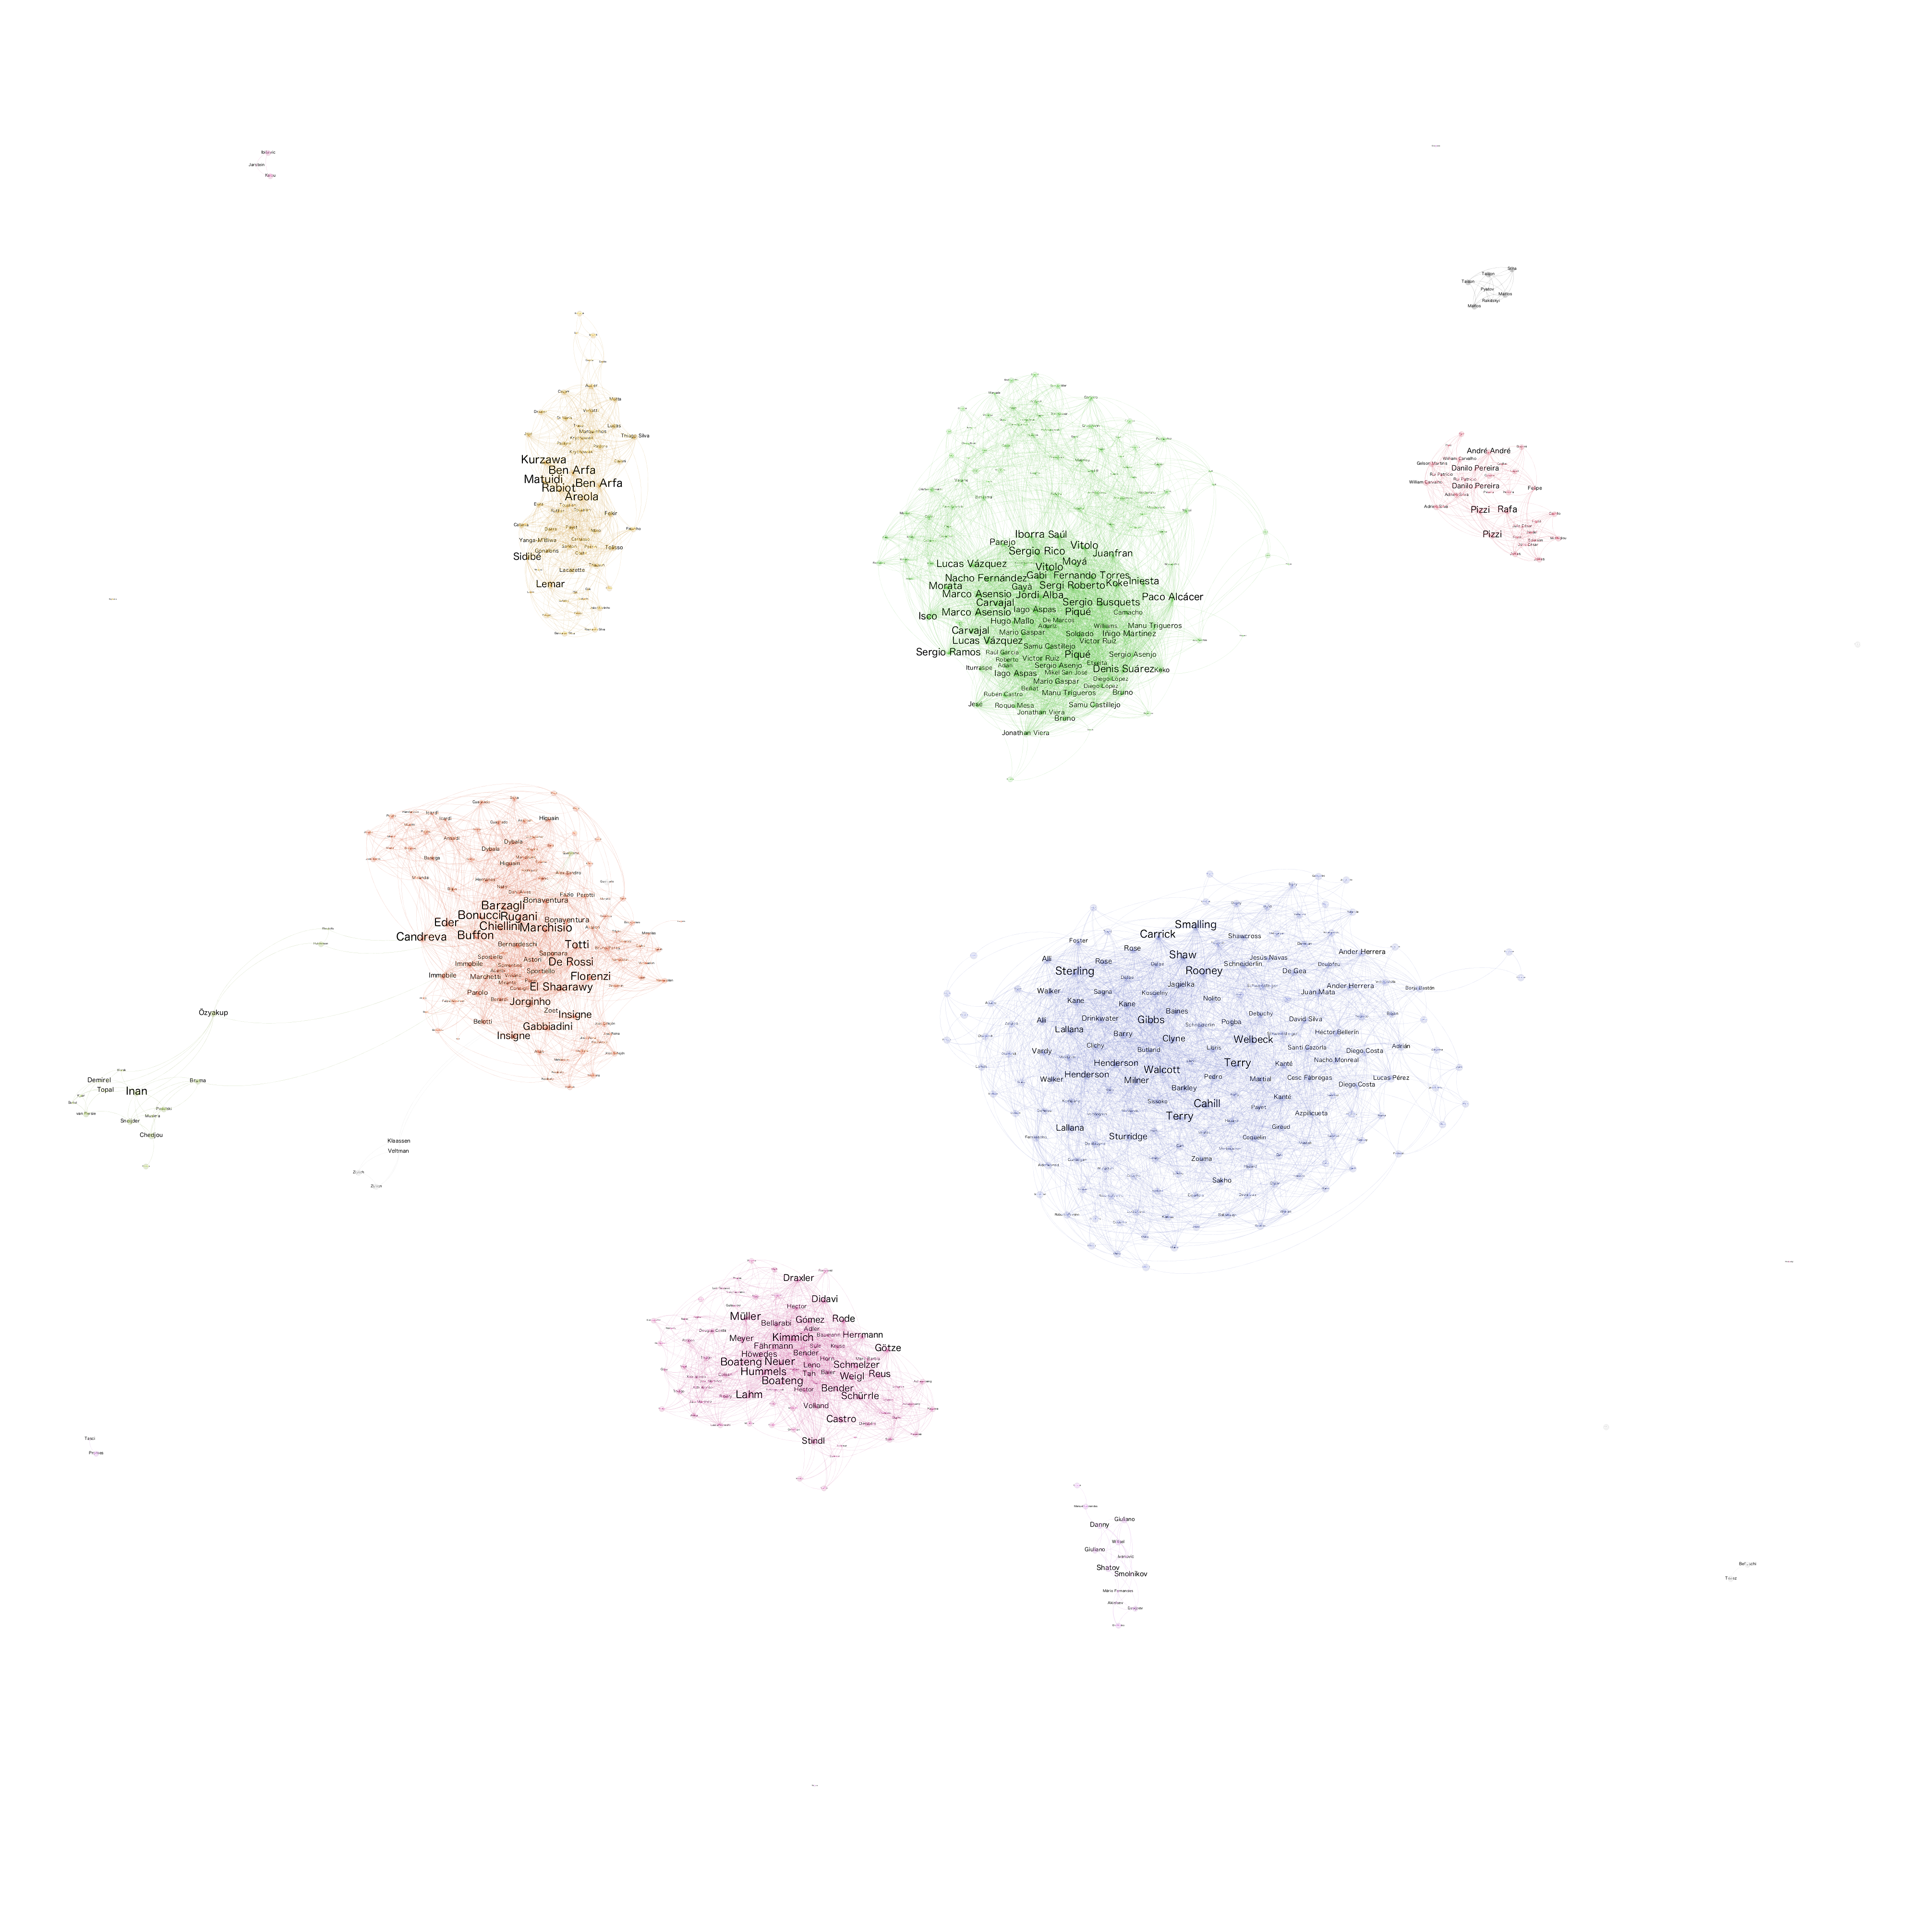

In [3]:
Image(filename = "images/fifa.png", embed=True)

color - by **nation**

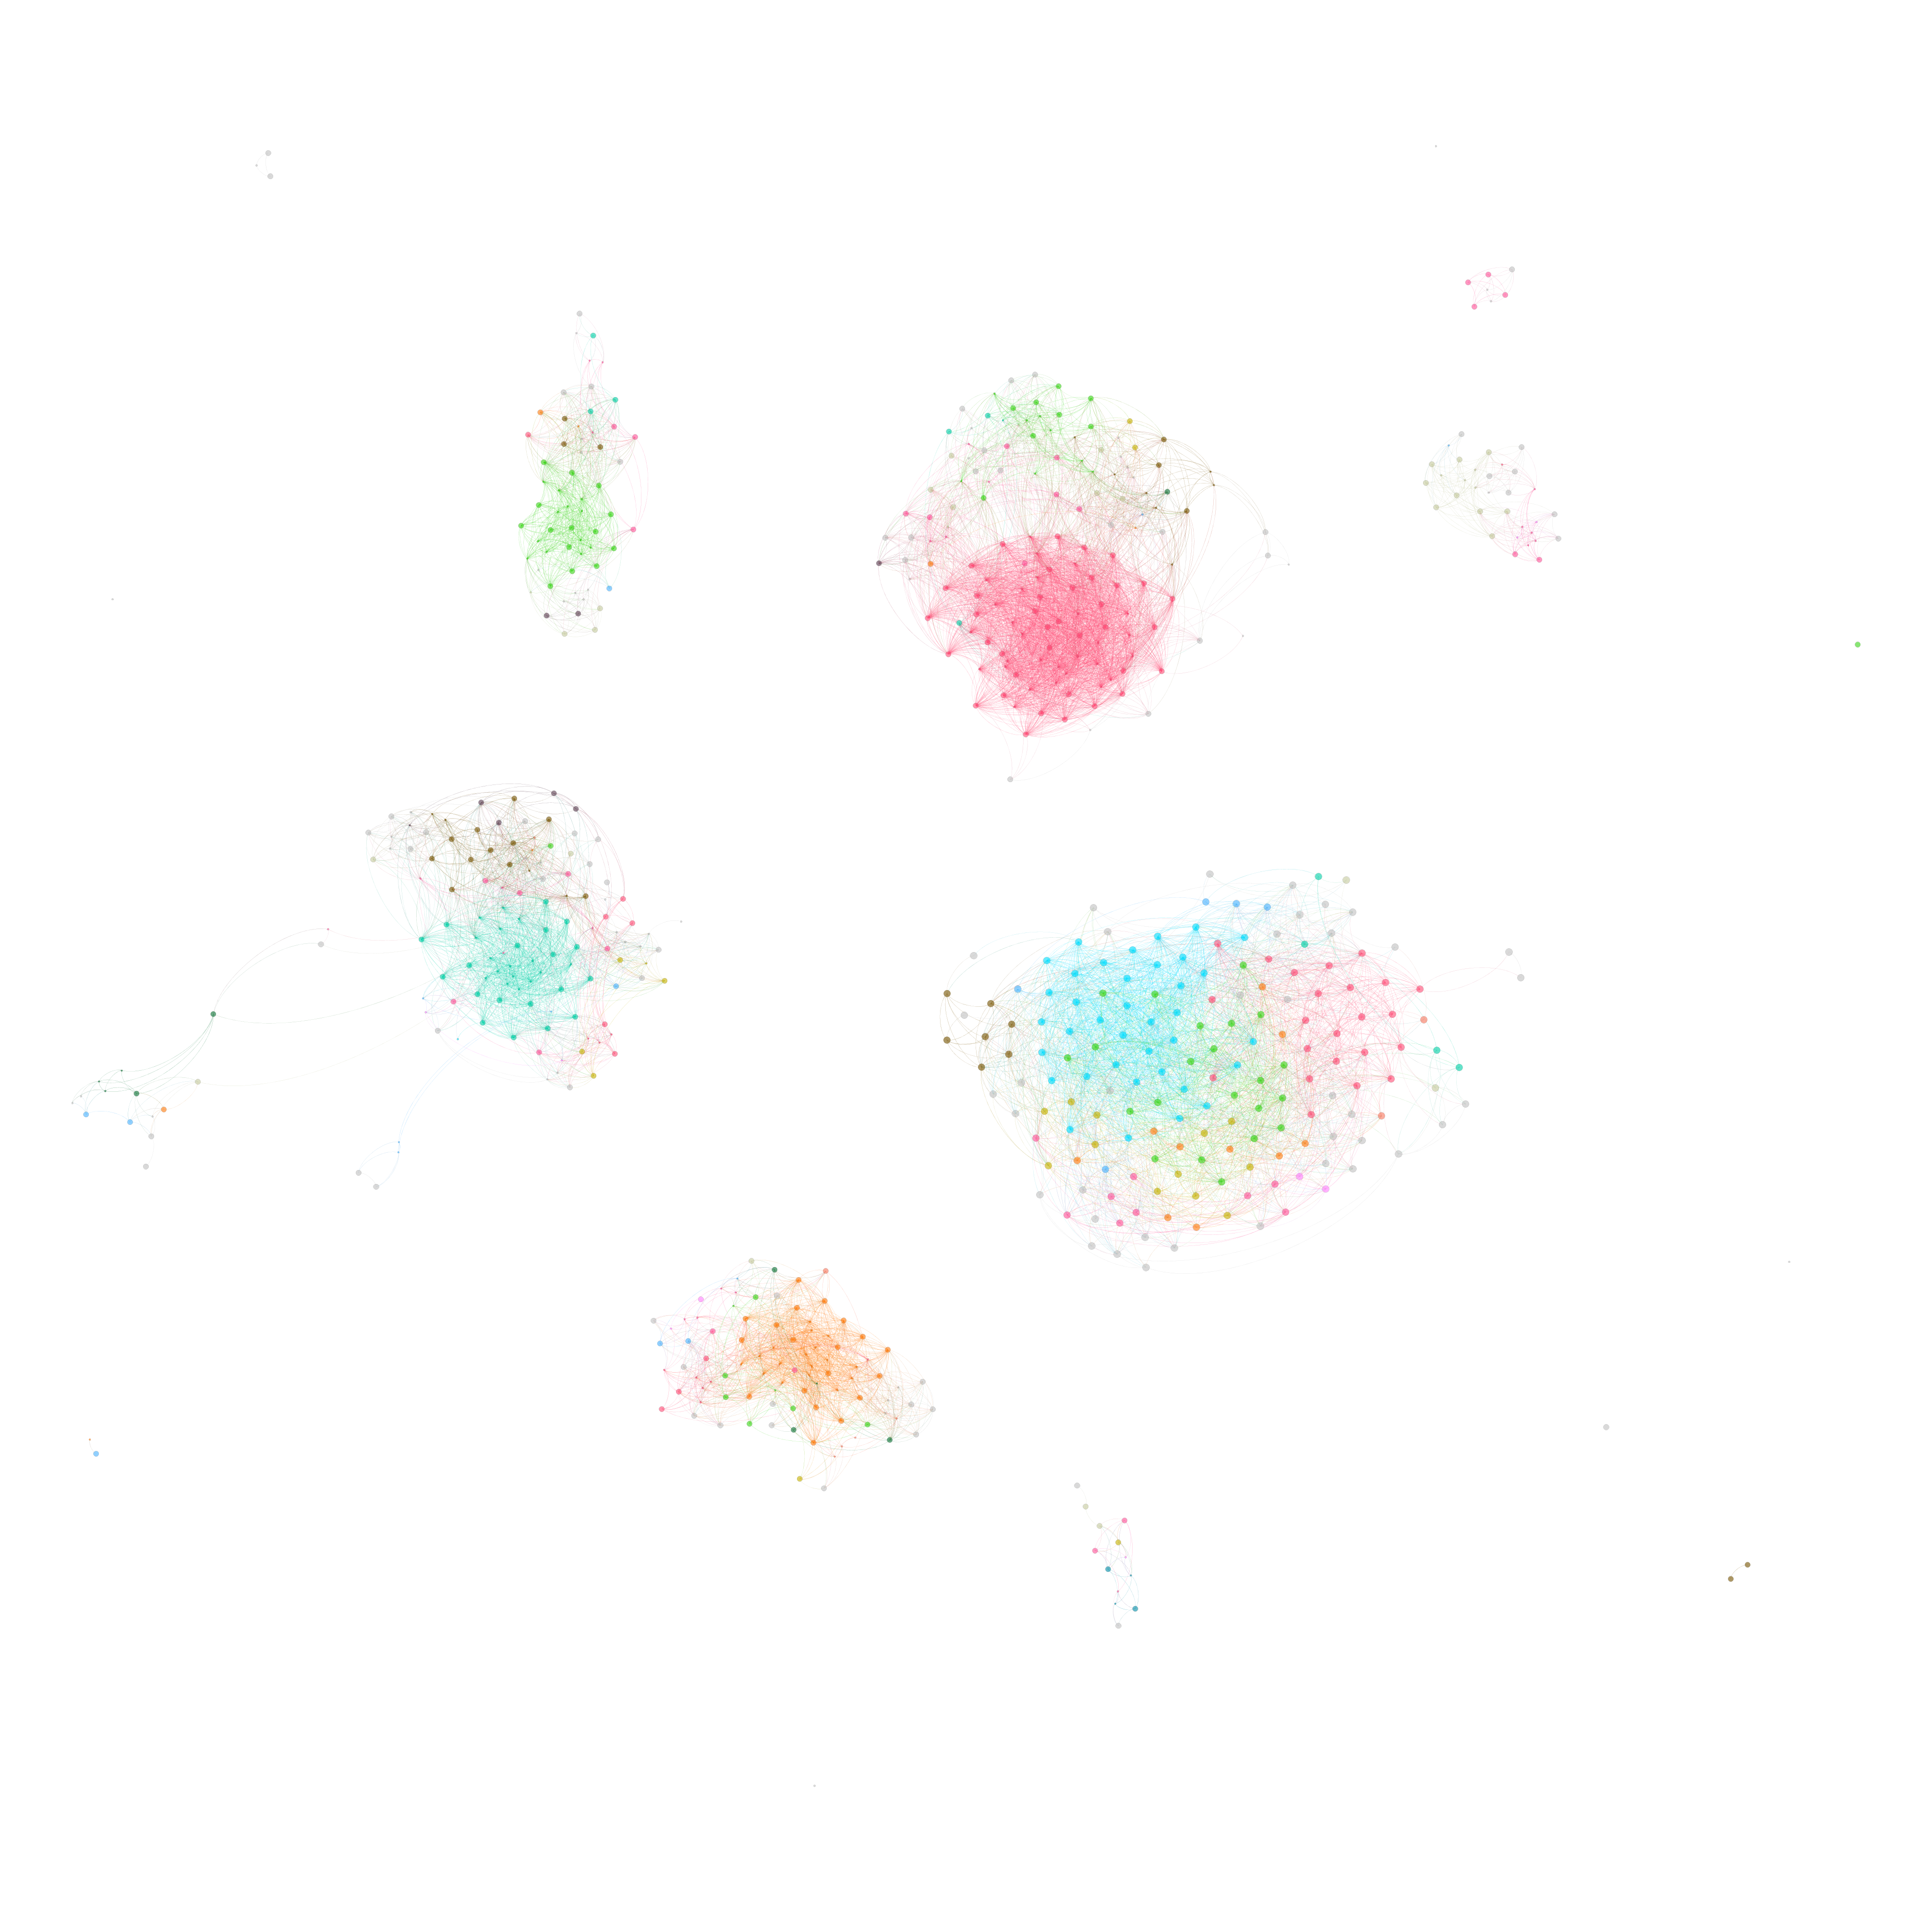

In [4]:
Image(filename = "images/fifa_by_nation.png", embed=True)